In [31]:
# previously recorded values from the reconnaissance run of dcraw
black = 2044
white = 16383
r_scale = 2.165039
g_scale = 1.0
b_scale = 1.643555

## python initials
here, we use skimage's imread to get read the image and obtain values

In [32]:
import numpy as np
from skimage.io import imread

image = imread("../../../data/Thayer.tiff").astype(np.float32)
print("height, width:", image.shape, "as type", image.dtype)
print("bits per pixel:", image.itemsize * 8)

height, width: (4016, 6020) as type float32
bits per pixel: 32


we can then convert this image into a double-precision array

In [33]:
image = image.astype(np.float64)
print("bits per pixel:", image.itemsize * 8)

bits per pixel: 64


## linearization
we can apply a linear transformation to the image so that the value \<black> is mapped to 0, and the value \<white> is mapped to 1. we then clip the negative values to 0, and values greater than 1 to 1

In [34]:
print("original min/max value:", image.min(), image.max())

image = (image - (black)) / (white - black)     # shift min to 0
print("post transformation min/max value:", image.min(), image.max())

image = np.clip(image, 0, 1)  # clip to [0, 1]
print("post clip min/max value:", image.min(), image.max())

original min/max value: 255.0 15305.0
post transformation min/max value: -0.12476462793779204 0.9248204198340191
post clip min/max value: 0.0 0.9248204198340191


## identifying the correct bayer pattern
we can begin by choosing a random bayer pattern to test for

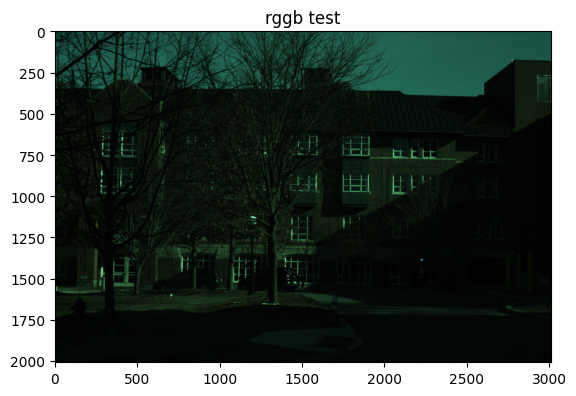

In [35]:
import matplotlib.pyplot as plt

# 1. bayer pattern guess
red = image[0::2, 0::2]
green1 = image[1::2, 0::2]
green2 = image[0::2, 1::2]
blue = image[1::2, 1::2]
# this is rggb, where red is top left, green1 is top right,
# green2 is bottom left, blue is bottom right

# averaging green
green = (green1 + green2) / 2

rgb_test_image = np.dstack((red, green, blue))
rgb_test_image = np.clip(rgb_test_image, 0, 1)
plt.imshow(rgb_test_image)
plt.title("rggb test")
plt.show()


we see here that our most promising result is obtained using rggb, which is slightly greener than we'd like. this, however, is expected considering the multipliers we obtained earlier for greens were 1, where those we obtained for blue and red were greater than 1. we will correct for this in the following step.

## white balancing
now that we have identified what we can assume is the correct bayer pattern, we can perform white balancing.

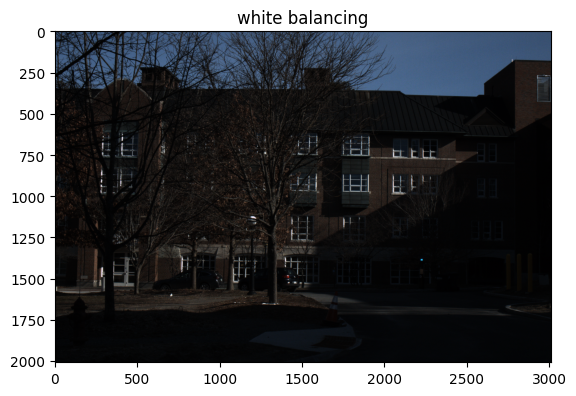

In [36]:
# white balancing
red = red * r_scale
green = green * g_scale
blue = blue * b_scale

# using dstack and clip to create the image
rgb_test_image = np.dstack((red, green, blue))
rgb_test_image = np.clip(rgb_test_image, 0, 1)

# 5. displaying
plt.imshow(rgb_test_image)
plt.title("white balancing")
plt.show()